# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This project contains web scraping using `BeautifulSoup` to collect information on 50 released movie based on popularity in 2021 from the IMDb web page. The DataFrame will be created using Pandas and cleaned up before implementing data visualization and analysis. The result of this project is to build a plot chart by using VScode and Flask. The webpage is attached as the following link:

https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31
 
IMDb is an online database of movie, TV, and celebrity content sources. According to Wikipedia 2022, the IMDb database contains approximately 8 million titles and 10.4 million private records. The popularity of a film on IMDb is calculated using the MOVIEmeter. It is based on the number of visitors on the movie page and is calculated on a weekly basis (IMDb.com, 2021).


### There are four information that will be scraped from the webpage:


1. **The release title**. 
2. **The Imdb rating**. 
   
   The IMDb rating is based on individual votes that are collected and categorized as a single rating of the    'released title'. The bottom line, it's only one vote per user per title. However, the user can update their vote on the same title, which will overwrite the old rating. The calculation itself is based on a weighted average.
   

3. **The Metascore**

   Based on IMDb's website, the Metascore corresponds to the rating of a film. It is assigned to review the movie based on large groups of respected movie critics. The calculation is based on a weighted average to finalize the range of their reviews. The highest Metascore is collected at least by four critics' reviews. 
   

4. **The number of votes**

### There are a few steps to scrape data in this project:

1. Requesting the data
2. Creating a BeautifulSoup object
2. Finding the right key to scrape the data 
3. Extracting the right information ( title, imdb rating, metascore, number of votes)
4. Initializing the storage and creating a `for` loop.
3. Creating data frame & data wrangling
4. Data visualization 
5. Analysis and Conclusion

### Dependencies:

1. Panda
2. Beautifulsoup4
3. Request
4. Matplotlib 
5. Numpy
6. Flask



## Requesting the data 

**Action to be done and insight in this section:**

- Begin with importing a required library `requests`.
- Request the webpage  by using `requests.get` to collect the content of the webpage and assign it to a variable called `url_get`.
- Print a small part of `url_get` to check the content of HTML.

> The following link contains the information related to the introduction of HMTL basics.https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics

In [1]:
import requests
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. Let's make Beautiful soup object and feel free to explore the object here.

## Creating a BeutifulSoup object

**Action to be done and insight in this section:**


- Import the `BeautifulSoup` from the package `bs4`.
- Create a Beautifulsoup object by using `BeautifulSoup`. The `hmtl-parser` is utilized because the the parsing is using Python’s built-in HTML parser.
- Assign the code to a variable called `soup`
- To observe the content in the `soup`, use `print(soup.prettify())`

In [3]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2021-01-01 and 2021-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imd

## Finding the right key 




**Action to be done and insight in this section :**

- Go to the IMDb's webpage. Right-click to the place that we're interested in and choose inspect element to observe the HMTL pages.
- The part that we are interested in (light blue) is nested in `<div> class="lister-list">` element.
- To observe tha content inside the `<div> class="lister-list">`, apply`.find()`, assign in a variable called `table` and print it.
- **To be continued...**

<img src="data/image1.png">

In [4]:
table = soup.find('div', class_='lister-list')
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt11286314">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt11286314/">
    <img alt="Don't Look Up" class="loadlate" data-tconst="tt11286314" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjZjNDE1NTYtYTgwZS00M2VmLWEyODktM2FlNjhiYTk3OGU2XkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_UX67_CR0,0,


**Continue:....................**

Below the element `<div> class="lister-list">`. 

- Found that the second hierarchy of `div` has `class` attribute with two attribute values called `lister-item mode-advanced`. This will be called the root element of the first movie container.
- Assigned a variable called `movie` to store all `div` elements with two attribute values called `lister-item mode-advanced`  by using `.find_all()`. 
- Applying `.len()`, found that there are 50 div elements containing those values. This represents 50 movies as shown on the webpage. 
- **The `movie` variable will be used for getting the information from the webpage**.

<img src="image7.png">



In [5]:
movie = soup.find_all('div', class_ = 'lister-item mode-advanced')
row_length = len(movie)
row_length

50

## Extract the data : The title of the movie

**Action to be done and an insight in this section :**

- Found that the title of the movie is wraped in a tag called `<a>`,  which is enclosed in a header tag `<h3>`.\
An example the first title movie of 'Don't Look Up' is located inside the `<a>` tag\
`<a href="/title/tt11286314/?ref_=adv_li_tt">Don't Look Up</a>`
- Since the header `.h3` is only one time appeared inside the the first root element. So, the scraper process can use attributes notation of `.h3` and `.a` to access those tags. 
- The command `.text` is required to return the result into a text.
- Assign code in a variable called `title`.



<img src="data/image3.png">

>Note : The following code cell shows the scrapping of the movie title for the first movie. 

In [6]:
title=movie[0].h3.a.text
title

"Don't Look Up"

## Extract the data : The IMDb Rating

**Action to be done and insight in this section :**

- Found that the name is located inside the `<strong>` tags.\
An example the first movie 'Don't Look Up' has a IMDb rating of 7.3\
`<strong>7.3</strong>`
- Since the tag `<strong>` is only one time appeared inside the the first root element. So, the scraper process can use attribute notation of `.strong.text` to access the content inside those tag. 
- Assign the code to variable called `rating`.

<img src="data/image4.png">


In [7]:
rating=movie[0].strong.text
rating

'7.3'

## Extract the data : The Metascore


**Action to be done and insight in this section :**

- Found that the metascore is wrapped in the `<span>` tag with an attribute-name of `class` and attribute value of `metascore`.\
An example for the first movie Don't look up has Metascore of 50.\
`<span class="metascore  mixed">50        </span>`
- Use `.find()` to find the first `span` tag with an attribute-name of `class` and attribute value of `metascore`. 
- Use the `metascore`instead of `metascore mixed` as an attribute value because the Metascore in IMDb is divided into several categories (favourable, mixed and unfavourable), which appeared on the webpage in different color codes. 
- Assign the code to a variable called`metascore`

<img src="data/image5.png">

In [8]:
metascore = movie[0].find('span', attrs = {'class':'metascore'}).text
metascore

'50        '

## Extract the data : The number of votes

**Action to be done and insight in this section :**

- The number of votes is enclosed within a `<span>` tag with the attribute name of `name` and its value of `nv`.\
Example for the first movie Don't look up has 271194 number of votes\
`<span name="nv" data-value="271194">271,194</span>`
- Use `.find()` with a parameter of `attrs` to pass in the attribute name of `name` and its value of `nv`. 
- Since  there are two numbers in the element, collect the value which does not have a comma by using `[data-value]`
- Assign the code to a variable called`votes`.

<img src="data/image6.png">

In [9]:
votes = movie[0].find('span', attrs = {'name':'nv'})['data-value']
votes

'286813'

## Initialize the storage and create a `for` loop.

**In this section, actions need to be done :**

- Create an empty list to store each extract data using `[ ]` and assign it as a variable called `temp`. 
- Create a `for` loop that will be utilized for collecting data from 50 movies on the webpage.

In [10]:
temp=[]

In [11]:
for i in range (0, row_length):

    #title of the released movie
    title = movie[i].h3.a.text
    
    #imdb_rating 
    rating = movie[i].strong.text
    
    #Create if function to collect metascore data and if it's not available return '0'. 
    #Use .strip() to remove an excess white spaces
    m_score = movie[i].find('span', attrs = {'class':'metascore'}).text if movie[i].find('span', attrs = {'class':'metascore'}) else '0'
    m_score = m_score.strip()    
    
    #votes
    vote = movie[i].find('span', attrs = {'name':'nv'})['data-value']
    
    temp.append((title,rating, m_score, vote))

In [12]:
temp

[("Don't Look Up", '7.3', '50', '286813'),
 ('Spider-Man: No Way Home', '8.8', '71', '355694'),
 ('The Matrix Resurrections', '5.7', '63', '142239'),
 ('Encanto', '7.3', '76', '68618'),
 ('The Book of Boba Fett', '8.1', '0', '14280'),
 ('1883', '9.1', '0', '12250'),
 ('The Wheel of Time', '7.3', '0', '71313'),
 ('Hawkeye', '7.8', '0', '97418'),
 ('Dexter: New Blood', '8.9', '0', '39278'),
 ("The King's Man", '6.8', '44', '12655'),
 ('Licorice Pizza', '8.1', '89', '9746'),
 ('The Power of the Dog', '7.0', '89', '64269'),
 ('Sing 2', '7.6', '49', '7160'),
 ('The Unforgivable', '7.2', '41', '71190'),
 ('No Time to Die', '7.4', '68', '274372'),
 ('The Silent Sea', '7.0', '0', '8939'),
 ('Being the Ricardos', '6.6', '60', '17119'),
 ('Yellowjackets', '8.0', '0', '10210'),
 ('Dune', '8.2', '74', '429705'),
 ('West Side Story', '7.8', '85', '22454'),
 ('The Lost Daughter', '6.8', '86', '17059'),
 ('The Last Duel', '7.4', '67', '80463'),
 ('Station Eleven', '7.2', '0', '4695'),
 ('Arcane', '9.

## Creating data frame & Data wrangling

- Import pandas library 
- Save the array into dataframe called `df`. 
- As shown, there are 50 movies in the webpage. Metascore is '0', it represents the metascore data is not available. 

In [13]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('movie_name','imdb_rating','metascore','votes'))
df

,movie_name,imdb_rating,metascore,votes
0,Don't Look Up,7.3,50,286813
1,Spider-Man: No Way Home,8.8,71,355694
2,The Matrix Resurrections,5.7,63,142239
3,Encanto,7.3,76,68618
4,The Book of Boba Fett,8.1,0,14280
5,1883,9.1,0,12250
6,The Wheel of Time,7.3,0,71313
7,Hawkeye,7.8,0,97418
8,Dexter: New Blood,8.9,0,39278
9,The King's Man,6.8,44,12655


## Cleaning the data

- The propose for this section is to prepare and celan up the data before visualization. 
- Check the type data for each column and change it to become an appropriate result.
- Based on `.info()` the DataFrame does not contain null values. However, the data type should be adjusted. 
- Change the metascore and votes datatype to interger while imdb_rating to float by using astype()
- For visualization proposes : Replace `0` in metascore data into `NaN` 
- Collect top seven popular movies and assign it to a variable called `top_seven_movie`

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_name   50 non-null     object
 1   imdb_rating  50 non-null     object
 2   metascore    50 non-null     object
 3   votes        50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [15]:
import numpy as np
df[['votes','metascore']] = df[['votes','metascore']].astype('int')
df['imdb_rating']=df['imdb_rating'].astype('float')
df['metascore']=df['metascore'].replace(0,np.nan)

df.dtypes

movie_name      object
imdb_rating    float64
metascore      float64
votes            int64
dtype: object

## Seven most popular movie in 2021 based on IMDb.

In [16]:
top_seven_movie=df.head(7)
top_seven_movie

,movie_name,imdb_rating,metascore,votes
0,Don't Look Up,7.3,50.0,286813
1,Spider-Man: No Way Home,8.8,71.0,355694
2,The Matrix Resurrections,5.7,63.0,142239
3,Encanto,7.3,76.0,68618
4,The Book of Boba Fett,8.1,NaN,14280
5,1883,9.1,NaN,12250
6,The Wheel of Time,7.3,NaN,71313


## Data visualisation

### Bar Plot

**The following bar plot shown the comparison of top seven popular movie based on the IMDb rating, Metascore and Number of votes (From left to right). Notice here that the Metascore plot only shows four movies due to no available Metascore data on some movies** 

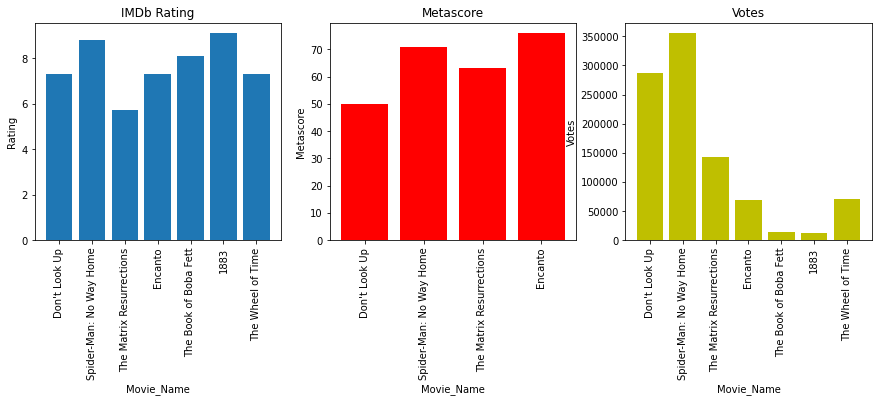

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(top_seven_movie['movie_name'],top_seven_movie['imdb_rating'])
axes[0].set_ylabel('Rating')
axes[0].set_xlabel('Movie_Name')
axes[0].set_title("IMDb Rating")
axes[0].tick_params('x',labelrotation=90)

axes[1].bar(top_seven_movie['movie_name'],top_seven_movie['metascore'], color ='r')
axes[1].set_ylabel('Metascore')
axes[1].set_xlabel('Movie_Name')
axes[1].set_title("Metascore")
axes[1].tick_params('x',labelrotation=90)

axes[2].bar(top_seven_movie['movie_name'],top_seven_movie['votes'],color='y')
axes[2].set_ylabel('Votes')
axes[2].set_xlabel('Movie_Name')
axes[2].set_title("Votes")
axes[2].tick_params('x',labelrotation=90)


plt.show()

### Histogram Plot

**The following histogram plot shown the distribution of seven popular movie based on the IMDb rating, Metascore and Number of votes.** 

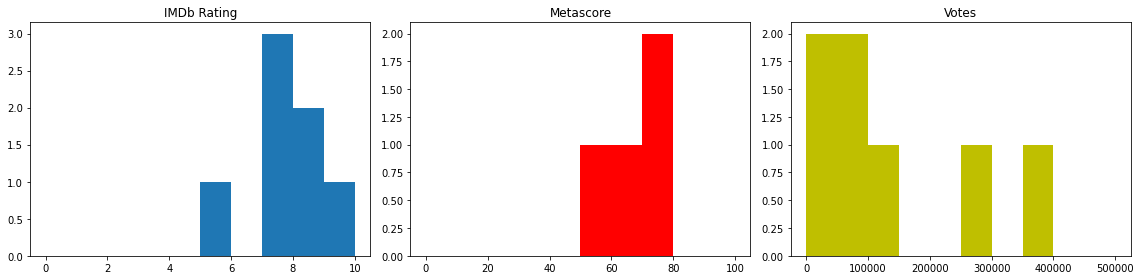

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

axes[0].hist(top_seven_movie['imdb_rating'], range = (0,10)) 
axes[0].set_title('IMDb Rating')

axes[1].hist(top_seven_movie['metascore'], range = (0,100), color='r') 
axes[1].set_title('Metascore')

axes[2].hist(top_seven_movie['votes'], range = (0,500000), color='y') 
axes[2].set_title('Votes')

plt.tight_layout()
plt.show()

## Box Plot

**The following box plot shown the distribution of seven popular movie.**

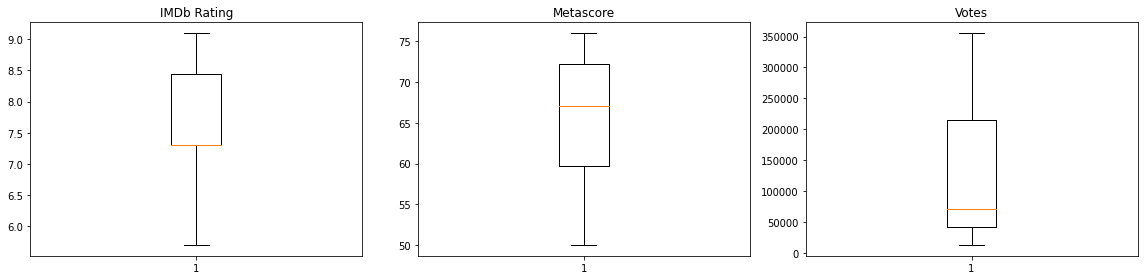

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

axes[0].boxplot(top_seven_movie['imdb_rating']) 
axes[0].set_title('IMDb Rating')

axes[1].boxplot(top_seven_movie.iloc[:4,]['metascore']) 
axes[1].set_title('Metascore')

axes[2].boxplot(top_seven_movie['votes']) 
axes[2].set_title('Votes')

plt.tight_layout()
plt.show()

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
top_seven_movie.describe()

,imdb_rating,metascore,votes
count,7.00,4.00,7.00
mean,7.66,65.00,135886.71
std,1.14,11.34,135341.18
min,5.70,50.00,12250.00
25%,7.30,59.75,41449.00
50%,7.30,67.00,71313.00
75%,8.45,72.25,214526.00
max,9.10,76.00,355694.00


## ADDITIONAL : scatter plot for all movie (with metascore data)

- Create a varible called `movie_meta` to collect all movies with metascore data
- Create a scatter plot for each variable by using matplotlib

In [22]:
df['metascore']=df['metascore'].replace(np.nan, 0)
movie_meta=df[df['metascore'] != 0]
movie_meta.shape

(28, 4)

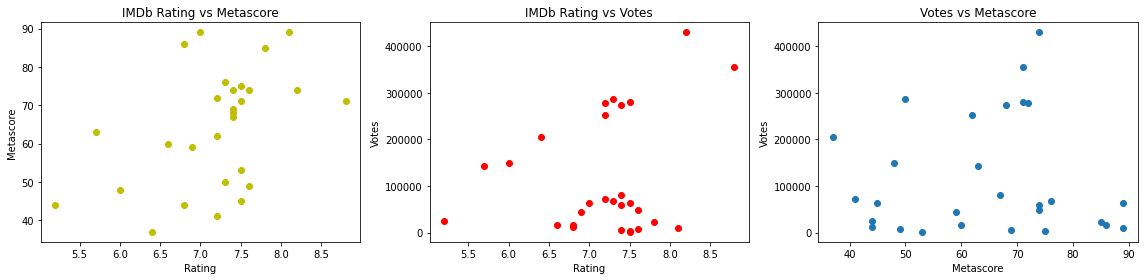

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

axes[0].scatter(movie_meta['imdb_rating'], movie_meta['metascore'], color='y') 
axes[0].set_title('IMDb Rating vs Metascore')
axes[0].set_ylabel('Metascore')
axes[0].set_xlabel('Rating')

axes[1].scatter(movie_meta['imdb_rating'], movie_meta['votes'], color='r') 
axes[1].set_title('IMDb Rating vs Votes')
axes[1].set_ylabel('Votes')
axes[1].set_xlabel('Rating')

axes[2].scatter(movie_meta['metascore'], movie_meta['votes']) 
axes[2].set_title('Votes vs Metascore')
axes[2].set_ylabel('Votes')
axes[2].set_xlabel('Metascore')

plt.tight_layout()
plt.show()

## Analysis and Conclusion

The top seven movies based on popularity in 2021 are: Don't look up, Spider-Man: No Way Home, The Matrix Resurrections, Encanto, The Book of Boba Fett, 1883, and The Wheel of Time. 

The histogram shows that the IMDb rating of those movies is mostly distributed between  7 and 8 ( mean is 7.6 ). It implies that the top popular movie often has a high number of ratings. The distribution of Metascore also lies on the high side. However, the distribution is less dispersed compared to the rating, which confirms by standard deviation. Needs to be aware that 42% of sample Metascore data is not available, so further analysis should be performed to justify the whole condition.   

Based on the bar plot, the most popular movie (Don't look up) does not have the highest number of ratings, metascore or number of votes. It is because the calculation for popularity in IMDb is quite different from other categories. The popularity in IMDb is based on the number of visitors who visit the pages of the movie, while the rating is based on members reviews. 

The scatter plot represents that there is no strong connection or relationship between each category. It implies that eventhough the movie is classified as high rating by members, it does not mean to have a high review from the movie's critics. The assumption could be that members give the rating based on 'like' or 'dislike' without considering the review of the movie. 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.